In [1]:
import pandas as pd
import numpy as np
import scipy
from backtesting import arima_garch_python as models
from backtesting.generate_schedules import generate_schedule
import matplotlib.pyplot as plt
from os.path import join as pjoin
from common.config import env_path, final_dir
from common.my_functions import load_arima_garch_predictions
import statsmodels.api as sm

import warnings
plt.rcParams['figure.figsize'] = [16, 10]
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None


In [2]:
final_object = models.ArimaGarchAnalyzer(cost='default', start_capital=10000, start_dte=[pd.to_datetime('2006-01-03')],
                                         end_dte=[pd.to_datetime('2023-12-29')], log_to_file=True)

2024-11-03 17:05:19 -- INFO -- OutputAnalyzer:  Zakończono obliczanie strategii Buy&Hold od 2006-01-03 00:00:00 do 2023-12-29 00:00:00, końcowa wartość inwestycji: 37590.47614115516
2024-11-03 17:05:19 -- INFO -- OutputAnalyzer:  Wczytano dane do atrybutu buy_and_hold_df, koszt transakcyjny: 0.007343695315617694%
2024-11-03 17:05:21 -- INFO -- ArimaGarchAnalyzer:  Wczytanie outputów z R zakończone sukcesem
2024-11-03 17:05:21 -- INFO -- ArimaGarchAnalyzer:  Wczytano pliki do analizy


In [4]:
files_path = pjoin(env_path, 'switching_regimes_output')
dtype_mapping = {'Predictions': float}
dict_dir = final_dir

for name, f in dict_dir.items():
    files_path_f = pjoin(files_path, name)
    final_object.__setattr__(dict_dir.get(name),
                             pd.read_csv(files_path_f, dtype=dtype_mapping, parse_dates=['Date']).set_index(['Date']))
    final_object.list_of_files.append(f)



In [5]:
final_object.predictions_to_signals(final_object.list_of_files)
final_object.calculate_investment_value(final_object.list_of_files)
final_object.strategies_metrics


,ARC,ASD,MaxDD,IR,AdjIR
Buy&Hold,0.076461,0.198843,0.567754,0.384527,0.051785
arima_250,0.070363,0.198398,0.680167,0.354655,0.036689
eGARCH_ged_250,-0.015406,0.198488,0.775382,-0.077618,-0.001542
eGARCH_sstd_250,-0.016206,0.198488,0.711951,-0.081648,-0.001859
eGARCH_snorm_250,0.093951,0.198351,0.560960,0.473661,0.079330
eGARCH_jsu_250,0.020923,0.198466,0.493929,0.105422,0.004466
sGARCH_ged_250,0.034484,0.198452,0.505307,0.173762,0.011858
sGARCH_sstd_250,0.024015,0.198463,0.403705,0.121005,0.007198
sGARCH_snorm_250,0.043154,0.198441,0.405582,0.217468,0.023139
sGARCH_jsu_250,0.027795,0.198459,0.633626,0.140055,0.006144


2024-11-03 17:05:46 -- INFO -- ArimaGarchAnalyzer:  Rozpoczynam rysowanie wykresów z atrybutów []
2024-11-03 17:05:46 -- INFO -- ArimaGarchAnalyzer:  pd.DataFrame na bazie którego narysowano wykres został zapisany jako atrybut o nazwie dfs_to_plot i jest łatwo dostępny z poziomu obiektu


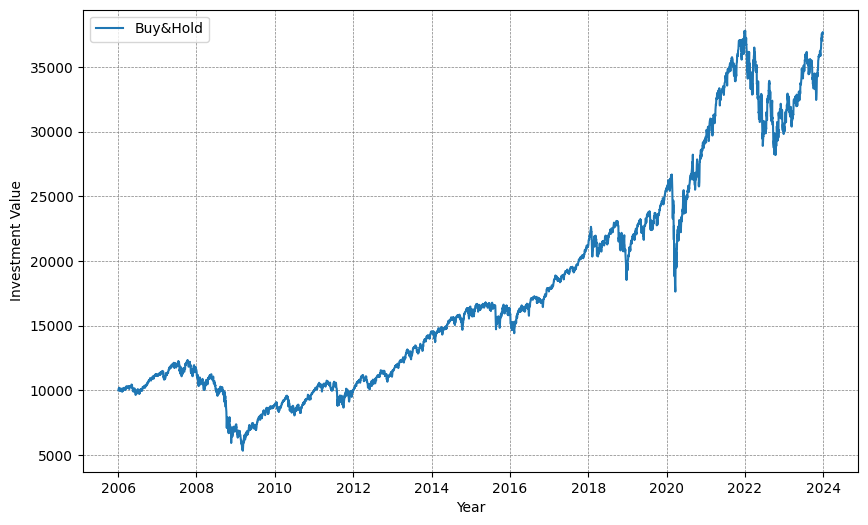

In [6]:
names_ = [n for n in final_object.list_of_files if 'ml_df_final_' in n]

final_object.plot_strategies(names_)


In [7]:
plt.rcParams['figure.figsize'] = [10, 6]
ts = final_object.main_df
ts['Return'] = np.log(ts['Close'] / ts['ClosePrevious'])
# ts = ts[(ts.index >= pd.Timestamp(1996, 1, 1)) & (ts.index <= pd.Timestamp(2005, 12,31))][['Close', 'Return']]
ts = ts[(ts.index >= pd.Timestamp(2006, 1, 1)) & (ts.index <= pd.Timestamp(2015, 12,31))][['Close', 'Return']]
ts


,Close,Return
date,,
2006-01-03,1268.800049,0.016297
2006-01-04,1273.459961,0.003666
2006-01-05,1273.479980,0.000016
2006-01-06,1285.449951,0.009356
2006-01-09,1290.150024,0.003650
...,...,...
2015-12-24,2060.989990,-0.001600
2015-12-28,2056.500000,-0.002181
2015-12-29,2078.360107,0.010574


In [8]:
model = sm.tsa.MarkovRegression(ts['Return'], k_regimes=2, trend='n', switching_variance=True)
res = model.fit()

smoothed_probs = res.smoothed_marginal_probabilities
regimes = smoothed_probs.idxmax(axis=1)
regimes_df = ts.join(pd.DataFrame({'Regime': regimes}), how='inner')
regimes_df


C:\Users\damia\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Close,Return,Regime
date,,,
2006-01-03,1268.800049,0.016297,0
2006-01-04,1273.459961,0.003666,0
2006-01-05,1273.479980,0.000016,0
2006-01-06,1285.449951,0.009356,0
2006-01-09,1290.150024,0.003650,0
...,...,...,...
2015-12-24,2060.989990,-0.001600,0
2015-12-28,2056.500000,-0.002181,0
2015-12-29,2078.360107,0.010574,0


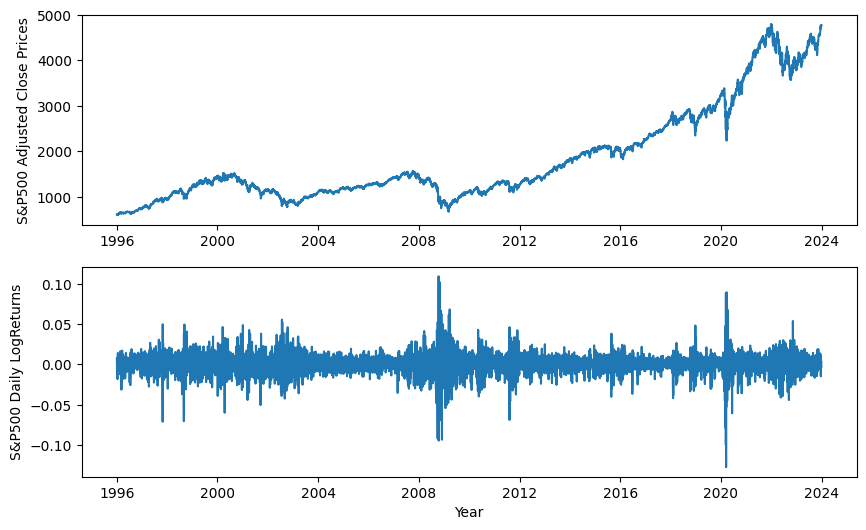

In [9]:
ts_full = final_object.main_df
ts_full['Return'] = np.log(ts_full['Close'] / ts_full['ClosePrevious'])
ts_full = ts_full[(ts_full.index >= pd.Timestamp(1996, 1, 1)) & (ts_full.index <= pd.Timestamp(2023, 12,31))][['Close', 'Return']]



fig, (ax1, ax2) = plt.subplots(2,  1)
# fig.suptitle('S&P 500 performance during 1996 - 2023')

ax1.plot(ts_full.index, ts_full['Close'])
ax1.set_ylabel('S&P500 Adjusted Close Prices')

ax2.plot(ts_full.index, ts_full['Return'])
ax2.set_xlabel('Year')
ax2.set_ylabel('S&P500 Daily LogReturns')

plt.show()

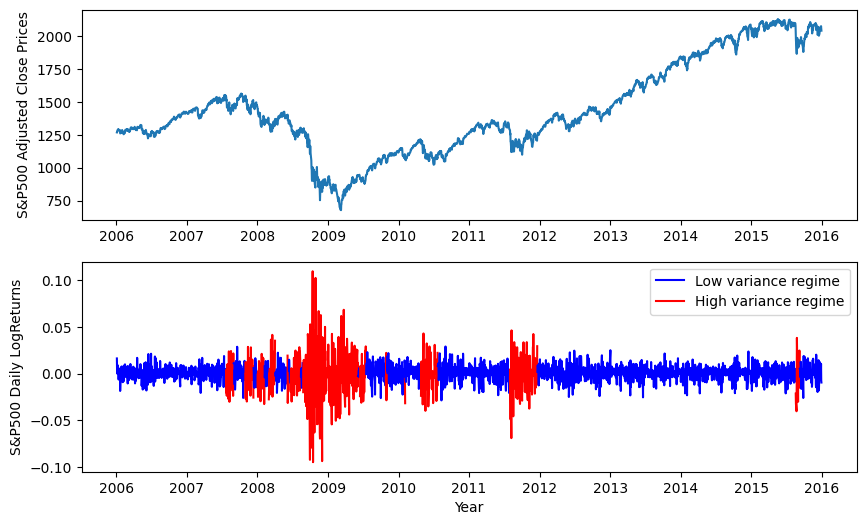

In [10]:
fig, (ax1, ax2) = plt.subplots(2,  1)
# fig.suptitle('S&P 500 example variance regime switching')

ax1.plot(ts.index, ts['Close'])
ax1.set_ylabel('S&P500 Adjusted Close Prices')

# Wykres zwrotów z różnymi kolorami dla różnych reżimów
colors = {0: 'blue', 1: 'red'}
labels = {0: 'Low variance regime', 1: 'High variance regime'}

# Przechodzenie przez reżimy i rysowanie segmentów
prev_regime = None
x_segment = []
y_segment = []
legend_added = set()

for i in range(len(regimes_df)):
    regime = regimes_df['Regime'].iloc[i]
    if prev_regime is None or regime == prev_regime:
        x_segment.append(regimes_df.index[i])
        y_segment.append(regimes_df['Return'].iloc[i])
    else:
        label = labels[prev_regime] if prev_regime not in legend_added else ""
        ax2.plot(x_segment, y_segment, color=colors[prev_regime], label=label)
        legend_added.add(prev_regime)
        x_segment = [regimes_df.index[i]]
        y_segment = [regimes_df['Return'].iloc[i]]
    prev_regime = regime

# Rysowanie ostatniego segmentu
if x_segment and y_segment:
    label = labels[prev_regime] if prev_regime not in legend_added else ""
    ax2.plot(x_segment, y_segment, color=colors[prev_regime], label=label)
    legend_added.add(prev_regime)

ax2.set_xlabel('Year')
ax2.set_ylabel('S&P500 Daily LogReturns')

# Dodanie legendy
ax2.legend()

plt.show()


[*********************100%%**********************]  1 of 1 completed


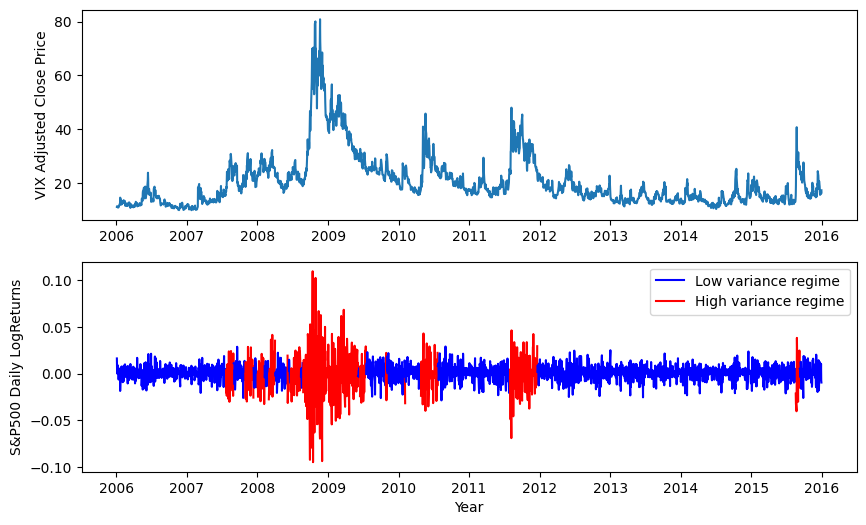

In [11]:
import yfinance as yf

plt.rcParams['figure.figsize'] = [10, 6]

# Pobieranie danych VIX z yfinance
vix = yf.download('^VIX', start='2006-01-01', end='2015-12-31')

# Rysowanie wykresu
fig, (ax1, ax2) = plt.subplots(2,  1)
# fig.suptitle('S&P 500 and VIX index performance during 2006 - 2015')

# Wykres VIX
ax1.plot(vix.index, vix['Close'])
ax1.set_ylabel('VIX Adjusted Close Price')

# Wykres zwrotów z różnymi kolorami dla różnych reżimów
colors = {0: 'blue', 1: 'red'}
labels = {0: 'Low variance regime', 1: 'High variance regime'}

# Przechodzenie przez reżimy i rysowanie segmentów
prev_regime = None
x_segment = []
y_segment = []
legend_added = set()

for i in range(len(regimes_df)):
    regime = regimes_df['Regime'].iloc[i]
    if prev_regime is None or regime == prev_regime:
        x_segment.append(regimes_df.index[i])
        y_segment.append(regimes_df['Return'].iloc[i])
    else:
        label = labels[prev_regime] if prev_regime not in legend_added else ""
        ax2.plot(x_segment, y_segment, color=colors[prev_regime], label=label)
        legend_added.add(prev_regime)
        x_segment = [regimes_df.index[i]]
        y_segment = [regimes_df['Return'].iloc[i]]
    prev_regime = regime

# Rysowanie ostatniego segmentu
if x_segment and y_segment:
    label = labels[prev_regime] if prev_regime not in legend_added else ""
    ax2.plot(x_segment, y_segment, color=colors[prev_regime], label=label)
    legend_added.add(prev_regime)

ax2.set_xlabel('Year')
ax2.set_ylabel('S&P500 Daily LogReturns')

# Dodanie legendy
ax2.legend()

plt.show()
# Dodanie legendy
ax2.legend()


[*********************100%%**********************]  1 of 1 completed


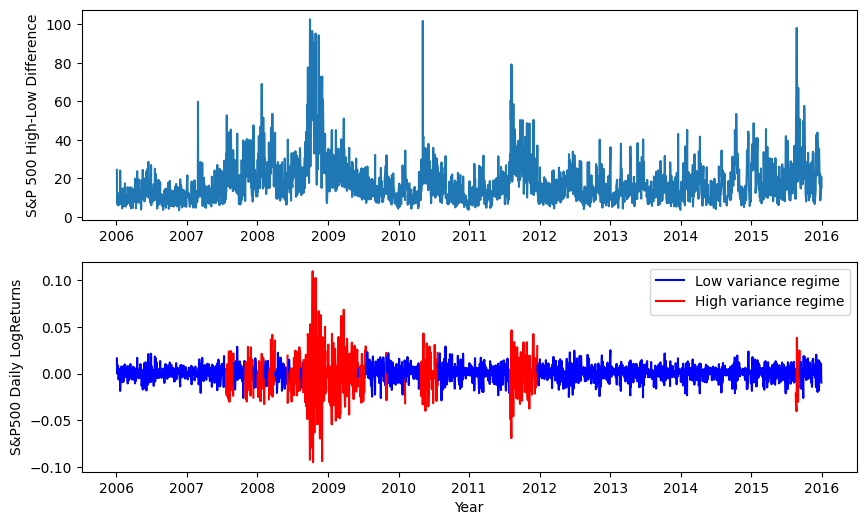

In [12]:
sp500 = yf.download('^GSPC', start='2006-01-01', end='2015-12-31')

# Obliczanie różnicy między ceną High i Low
sp500['High_Low_Diff'] = sp500['High'] - sp500['Low']

# Rysowanie wykresu
fig, (ax1, ax2) = plt.subplots(2,  1)
# fig.suptitle('S&P 500 and its High-Low Difference during 2006 - 2015')

# Wykres różnicy High-Low dla S&P 500
ax1.plot(sp500.index, sp500['High_Low_Diff'])
ax1.set_ylabel('S&P 500 High-Low Difference')

# Wykres zwrotów z różnymi kolorami dla różnych reżimów
colors = {0: 'blue', 1: 'red'}
labels = {0: 'Low variance regime', 1: 'High variance regime'}

# Przechodzenie przez reżimy i rysowanie segmentów
prev_regime = None
x_segment = []
y_segment = []
legend_added = set()

for i in range(len(regimes_df)):
    regime = regimes_df['Regime'].iloc[i]
    if prev_regime is None or regime == prev_regime:
        x_segment.append(regimes_df.index[i])
        y_segment.append(regimes_df['Return'].iloc[i])
    else:
        label = labels[prev_regime] if prev_regime not in legend_added else ""
        ax2.plot(x_segment, y_segment, color=colors[prev_regime], label=label)
        legend_added.add(prev_regime)
        x_segment = [regimes_df.index[i]]
        y_segment = [regimes_df['Return'].iloc[i]]
    prev_regime = regime

# Rysowanie ostatniego segmentu
if x_segment and y_segment:
    label = labels[prev_regime] if prev_regime not in legend_added else ""
    ax2.plot(x_segment, y_segment, color=colors[prev_regime], label=label)
    legend_added.add(prev_regime)

ax2.set_xlabel('Year')
ax2.set_ylabel('S&P500 Daily LogReturns')

# Dodanie legendy
ax2.legend()

plt.show()


[*********************100%%**********************]  1 of 1 completed


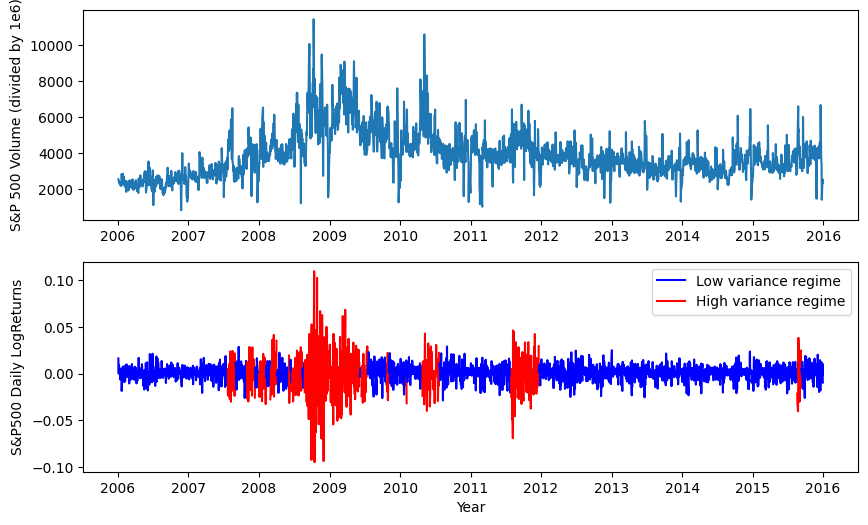

In [13]:
sp500 = yf.download('^GSPC', start='2006-01-01', end='2015-12-31')

# Rysowanie wykresu
fig, (ax1, ax2) = plt.subplots(2,  1)
# fig.suptitle('S&P 500 and its High-Low Difference during 2006 - 2015')

# Wykres różnicy High-Low dla S&P 500
ax1.plot(sp500.index, sp500['Volume']/1e6)
ax1.set_ylabel('S&P 500 Volume (divided by 1e6)')

# Wykres zwrotów z różnymi kolorami dla różnych reżimów
colors = {0: 'blue', 1: 'red'}
labels = {0: 'Low variance regime', 1: 'High variance regime'}

# Przechodzenie przez reżimy i rysowanie segmentów
prev_regime = None
x_segment = []
y_segment = []
legend_added = set()

for i in range(len(regimes_df)):
    regime = regimes_df['Regime'].iloc[i]
    if prev_regime is None or regime == prev_regime:
        x_segment.append(regimes_df.index[i])
        y_segment.append(regimes_df['Return'].iloc[i])
    else:
        label = labels[prev_regime] if prev_regime not in legend_added else ""
        ax2.plot(x_segment, y_segment, color=colors[prev_regime], label=label)
        legend_added.add(prev_regime)
        x_segment = [regimes_df.index[i]]
        y_segment = [regimes_df['Return'].iloc[i]]
    prev_regime = regime

# Rysowanie ostatniego segmentu
if x_segment and y_segment:
    label = labels[prev_regime] if prev_regime not in legend_added else ""
    ax2.plot(x_segment, y_segment, color=colors[prev_regime], label=label)
    legend_added.add(prev_regime)

ax2.set_xlabel('Year')
ax2.set_ylabel('S&P500 Daily LogReturns')

# Dodanie legendy
ax2.legend()

plt.show()

[*********************100%%**********************]  1 of 1 completed


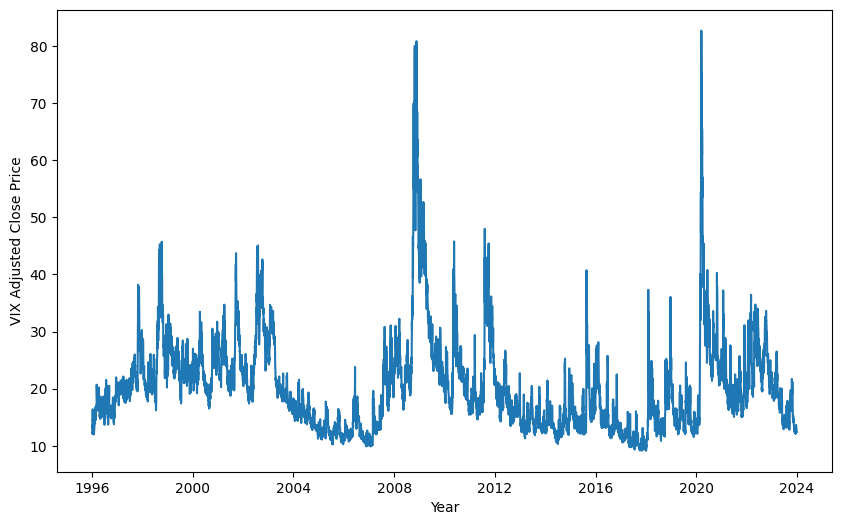

In [14]:
vix = yf.download('^VIX', start='1996-01-01', end='2023-12-31')

fig, ax = plt.subplots()

ax.plot(vix.index, vix['Close'])
ax.set_ylabel('VIX Adjusted Close Price')
ax.set_xlabel('Year')

plt.show()


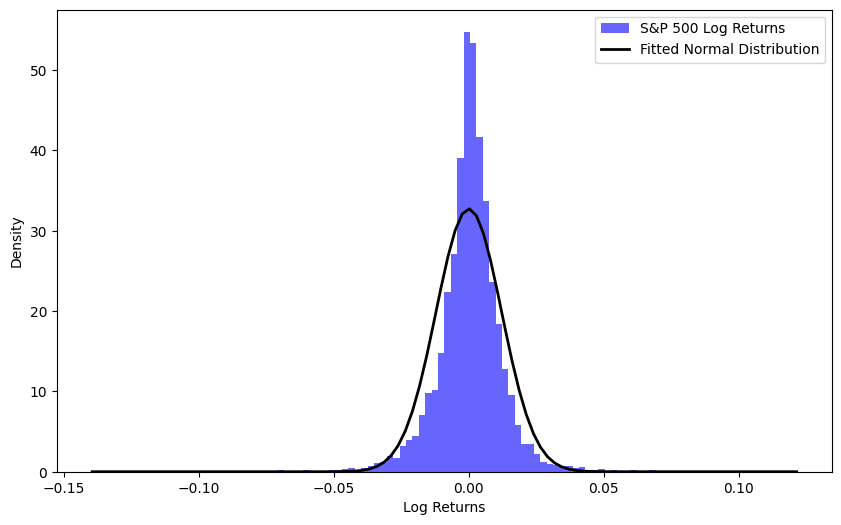

In [15]:
from scipy.stats import norm

log_returns = ts_full['Return']

# Parametry rozkładu normalnego N(0,1)
mu, std = norm.fit(log_returns)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))

# Histogram logarytmicznych stóp zwrotu
plt.hist(log_returns, bins=100, density=True, alpha=0.6, color='b', label='S&P 500 Log Returns')

# Krzywa rozkładu normalnego
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Fitted Normal Distribution')

# Dodanie tytułu, etykiet osi i legendy
# plt.title('Distribution of Log Returns S&P 500')
plt.xlabel('Log Returns')
plt.ylabel('Density')
plt.legend()

plt.show()


In [17]:
ts_full['Return'].quantile(.25)

-0.004892979104153576

In [18]:
idx = [obj for obj in final_object.list_of_files if ('GARCH' in obj or 'arima' in obj)] + ['Buy&Hold']
tab = final_object.strategies_metrics.loc[idx, :].round(4)
tab


,ARC,ASD,MaxDD,IR,AdjIR
arima_250,0.0704,0.1984,0.6802,0.3547,0.0367
eGARCH_ged_250,-0.0154,0.1985,0.7754,-0.0776,-0.0015
eGARCH_sstd_250,-0.0162,0.1985,0.7120,-0.0816,-0.0019
eGARCH_snorm_250,0.0940,0.1984,0.5610,0.4737,0.0793
eGARCH_jsu_250,0.0209,0.1985,0.4939,0.1054,0.0045
sGARCH_ged_250,0.0345,0.1985,0.5053,0.1738,0.0119
sGARCH_sstd_250,0.0240,0.1985,0.4037,0.1210,0.0072
sGARCH_snorm_250,0.0432,0.1984,0.4056,0.2175,0.0231
sGARCH_jsu_250,0.0278,0.1985,0.6336,0.1401,0.0061
arima_500,0.0724,0.1984,0.5006,0.3647,0.0527


2024-11-03 17:06:04 -- INFO -- ArimaGarchAnalyzer:  Rozpoczynam rysowanie wykresów z atrybutów ['sGARCH_ged_1000', 'eGARCH_ged_500', 'sGARCH_snorm_1000', 'arima_1500', 'sGARCH_snorm_1500', 'Buy&Hold']
2024-11-03 17:06:04 -- INFO -- ArimaGarchAnalyzer:  Atrybut Buy&Hold nie istnieje w obiekcie, zatem zostanie pominięty
2024-11-03 17:06:04 -- INFO -- ArimaGarchAnalyzer:  pd.DataFrame na bazie którego narysowano wykres został zapisany jako atrybut o nazwie dfs_to_plot i jest łatwo dostępny z poziomu obiektu


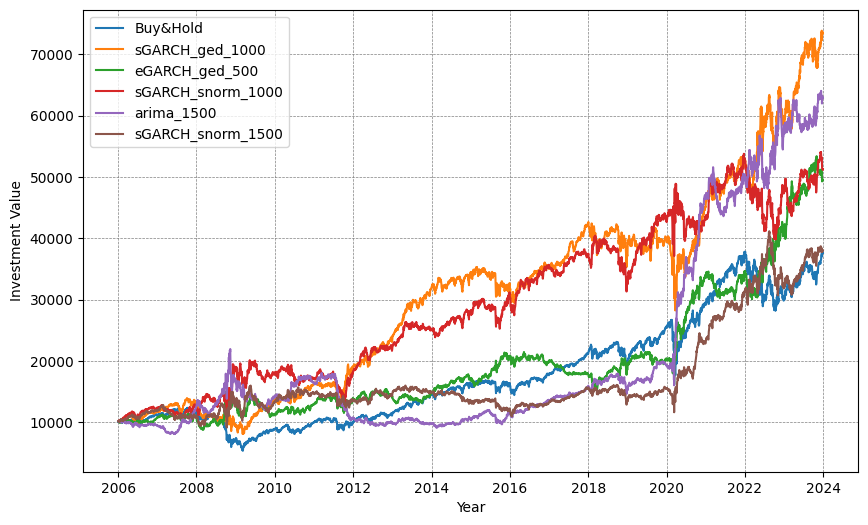

In [19]:
final_object.plot_strategies(['sGARCH_ged_1000', 'eGARCH_ged_500', 'sGARCH_snorm_1000', 'arima_1500', 'sGARCH_snorm_1500', 'Buy&Hold'])

In [20]:
final_object.strategies_metrics.round(4).loc[['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'sGARCH_ged_1000', 'eGARCH_ged_500', 'sGARCH_snorm_1000'], :].to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & ARC & ASD & MaxDD & IR & AdjIR \\\\\n\\midrule\nBuy&Hold & 0.076500 & 0.198800 & 0.567800 & 0.384500 & 0.051800 \\\\\nml_strategy_6_mov_2_reg & 0.105000 & 0.198300 & 0.507000 & 0.529600 & 0.109700 \\\\\nsGARCH_ged_1000 & 0.117300 & 0.198300 & 0.420300 & 0.591600 & 0.165100 \\\\\neGARCH_ged_500 & 0.093000 & 0.198400 & 0.295200 & 0.469000 & 0.147800 \\\\\nsGARCH_snorm_1000 & 0.095200 & 0.198400 & 0.338400 & 0.480000 & 0.135000 \\\\\n\\bottomrule\n\\end{tabular}\n'

2024-11-03 17:06:05 -- INFO -- ArimaGarchAnalyzer:  Rozpoczynam rysowanie wykresów z atrybutów ['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'sGARCH_ged_1000', 'eGARCH_ged_500', 'sGARCH_snorm_1000']
2024-11-03 17:06:05 -- INFO -- ArimaGarchAnalyzer:  Atrybut Buy&Hold nie istnieje w obiekcie, zatem zostanie pominięty
2024-11-03 17:06:05 -- INFO -- ArimaGarchAnalyzer:  pd.DataFrame na bazie którego narysowano wykres został zapisany jako atrybut o nazwie dfs_to_plot i jest łatwo dostępny z poziomu obiektu


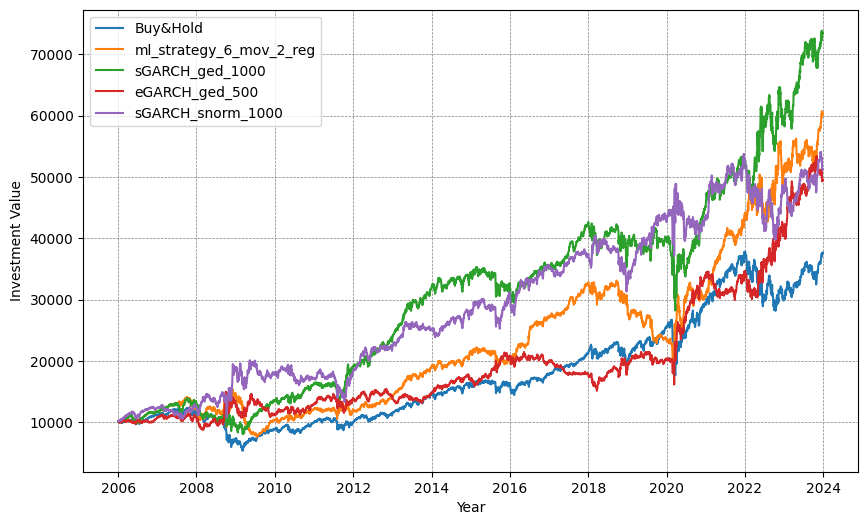

In [21]:
final_object.plot_strategies(['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'sGARCH_ged_1000', 'eGARCH_ged_500', 'sGARCH_snorm_1000'])

In [22]:
final_object.strategies_metrics.round(4).loc[['Buy&Hold', 'ml_strategy_3_mov_2_reg', 'ml_strategy_6_mov_2_reg', 'ml_strategy_12_mov_2_reg'], :].to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & ARC & ASD & MaxDD & IR & AdjIR \\\\\n\\midrule\nBuy&Hold & 0.076500 & 0.198800 & 0.567800 & 0.384500 & 0.051800 \\\\\nml_strategy_3_mov_2_reg & 0.124000 & 0.198300 & 0.449900 & 0.625600 & 0.172500 \\\\\nml_strategy_6_mov_2_reg & 0.105000 & 0.198300 & 0.507000 & 0.529600 & 0.109700 \\\\\nml_strategy_12_mov_2_reg & 0.103700 & 0.198300 & 0.569400 & 0.522700 & 0.095200 \\\\\n\\bottomrule\n\\end{tabular}\n'

2024-11-03 17:06:06 -- INFO -- ArimaGarchAnalyzer:  Rozpoczynam rysowanie wykresów z atrybutów ['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'ml_strategy_3_mov_2_reg', 'ml_strategy_12_mov_2_reg']
2024-11-03 17:06:06 -- INFO -- ArimaGarchAnalyzer:  Atrybut Buy&Hold nie istnieje w obiekcie, zatem zostanie pominięty
2024-11-03 17:06:06 -- INFO -- ArimaGarchAnalyzer:  pd.DataFrame na bazie którego narysowano wykres został zapisany jako atrybut o nazwie dfs_to_plot i jest łatwo dostępny z poziomu obiektu


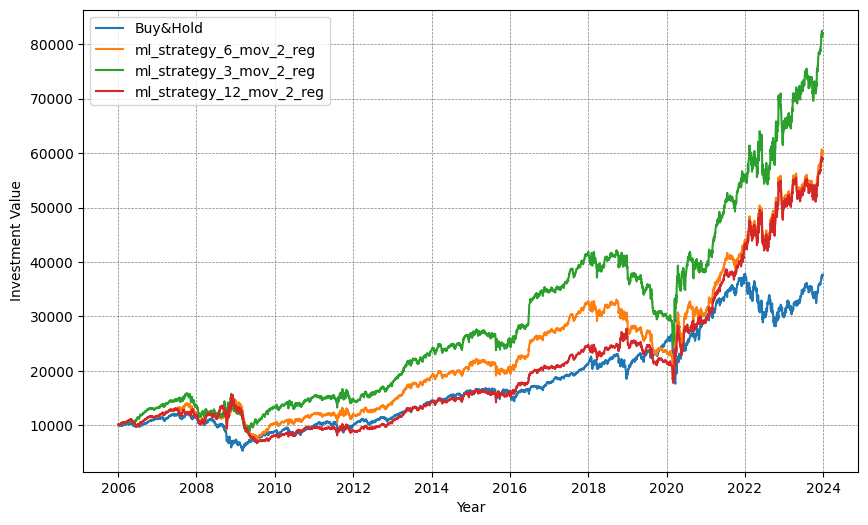

In [23]:
final_object.plot_strategies(['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'ml_strategy_3_mov_2_reg', 'ml_strategy_12_mov_2_reg'])

In [24]:
final_object.strategies_metrics.round(4).loc[['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'strategy_3_mov_2_reg', 'strategy_6_mov_2_reg', 'strategy_12_mov_2_reg'], :].to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & ARC & ASD & MaxDD & IR & AdjIR \\\\\n\\midrule\nBuy&Hold & 0.076500 & 0.198800 & 0.567800 & 0.384500 & 0.051800 \\\\\nml_strategy_6_mov_2_reg & 0.105000 & 0.198300 & 0.507000 & 0.529600 & 0.109700 \\\\\nstrategy_3_mov_2_reg & 0.061100 & 0.198400 & 0.541500 & 0.308000 & 0.034800 \\\\\nstrategy_6_mov_2_reg & 0.066600 & 0.198400 & 0.515100 & 0.335900 & 0.043500 \\\\\nstrategy_12_mov_2_reg & 0.056900 & 0.198400 & 0.583900 & 0.287000 & 0.028000 \\\\\n\\bottomrule\n\\end{tabular}\n'

2024-11-03 17:06:07 -- INFO -- ArimaGarchAnalyzer:  Rozpoczynam rysowanie wykresów z atrybutów ['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'strategy_6_mov_2_reg']
2024-11-03 17:06:07 -- INFO -- ArimaGarchAnalyzer:  Atrybut Buy&Hold nie istnieje w obiekcie, zatem zostanie pominięty
2024-11-03 17:06:07 -- INFO -- ArimaGarchAnalyzer:  pd.DataFrame na bazie którego narysowano wykres został zapisany jako atrybut o nazwie dfs_to_plot i jest łatwo dostępny z poziomu obiektu


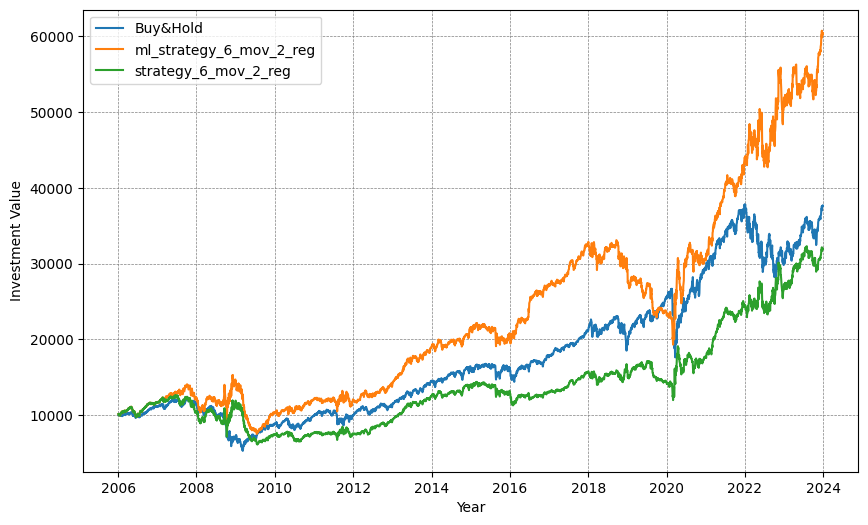

In [25]:
final_object.plot_strategies(['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'strategy_6_mov_2_reg'])

In [26]:
final_object.strategies_metrics.round(4).loc[['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'ml_strategy_3_exp_2_reg', 'ml_strategy_6_exp_2_reg', 'ml_strategy_12_exp_2_reg'], :].to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & ARC & ASD & MaxDD & IR & AdjIR \\\\\n\\midrule\nBuy&Hold & 0.076500 & 0.198800 & 0.567800 & 0.384500 & 0.051800 \\\\\nml_strategy_6_mov_2_reg & 0.105000 & 0.198300 & 0.507000 & 0.529600 & 0.109700 \\\\\nml_strategy_3_exp_2_reg & 0.061200 & 0.198400 & 0.559300 & 0.308600 & 0.033800 \\\\\nml_strategy_6_exp_2_reg & 0.042700 & 0.198400 & 0.549200 & 0.215400 & 0.016800 \\\\\nml_strategy_12_exp_2_reg & 0.045700 & 0.198400 & 0.645700 & 0.230500 & 0.016300 \\\\\n\\bottomrule\n\\end{tabular}\n'

2024-11-03 17:06:08 -- INFO -- ArimaGarchAnalyzer:  Rozpoczynam rysowanie wykresów z atrybutów ['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'ml_strategy_6_exp_2_reg']
2024-11-03 17:06:08 -- INFO -- ArimaGarchAnalyzer:  Atrybut Buy&Hold nie istnieje w obiekcie, zatem zostanie pominięty
2024-11-03 17:06:08 -- INFO -- ArimaGarchAnalyzer:  pd.DataFrame na bazie którego narysowano wykres został zapisany jako atrybut o nazwie dfs_to_plot i jest łatwo dostępny z poziomu obiektu


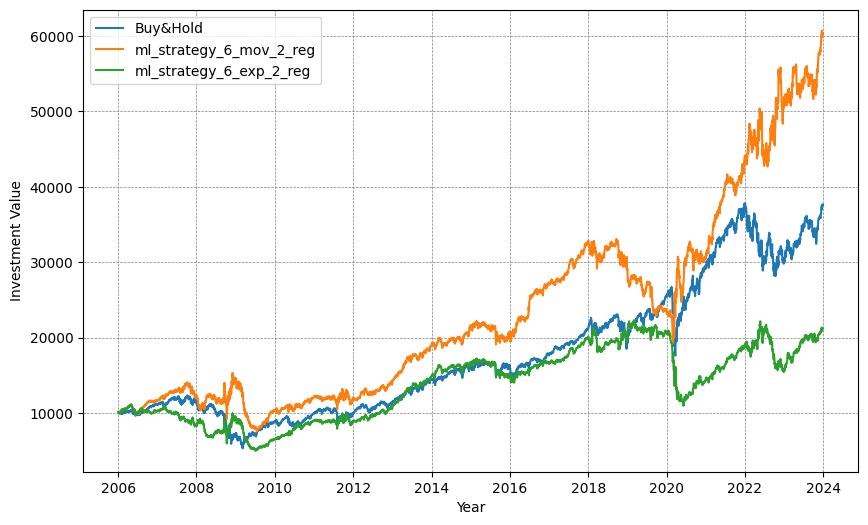

In [27]:
final_object.plot_strategies(['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'ml_strategy_6_exp_2_reg'])

In [28]:
final_object.strategies_metrics.round(4).loc[['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'strategy_3_exp_2_reg', 'strategy_6_exp_2_reg', 'strategy_12_exp_2_reg'], :].to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & ARC & ASD & MaxDD & IR & AdjIR \\\\\n\\midrule\nBuy&Hold & 0.076500 & 0.198800 & 0.567800 & 0.384500 & 0.051800 \\\\\nml_strategy_6_mov_2_reg & 0.105000 & 0.198300 & 0.507000 & 0.529600 & 0.109700 \\\\\nstrategy_3_exp_2_reg & 0.024600 & 0.198500 & 0.581200 & 0.123700 & 0.005200 \\\\\nstrategy_6_exp_2_reg & 0.021800 & 0.198500 & 0.511300 & 0.110000 & 0.004700 \\\\\nstrategy_12_exp_2_reg & 0.027700 & 0.198500 & 0.589100 & 0.139800 & 0.006600 \\\\\n\\bottomrule\n\\end{tabular}\n'

2024-11-03 17:06:08 -- INFO -- ArimaGarchAnalyzer:  Rozpoczynam rysowanie wykresów z atrybutów ['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'strategy_3_exp_2_reg', 'strategy_6_exp_2_reg', 'strategy_12_exp_2_reg']
2024-11-03 17:06:08 -- INFO -- ArimaGarchAnalyzer:  Atrybut Buy&Hold nie istnieje w obiekcie, zatem zostanie pominięty
2024-11-03 17:06:08 -- INFO -- ArimaGarchAnalyzer:  pd.DataFrame na bazie którego narysowano wykres został zapisany jako atrybut o nazwie dfs_to_plot i jest łatwo dostępny z poziomu obiektu


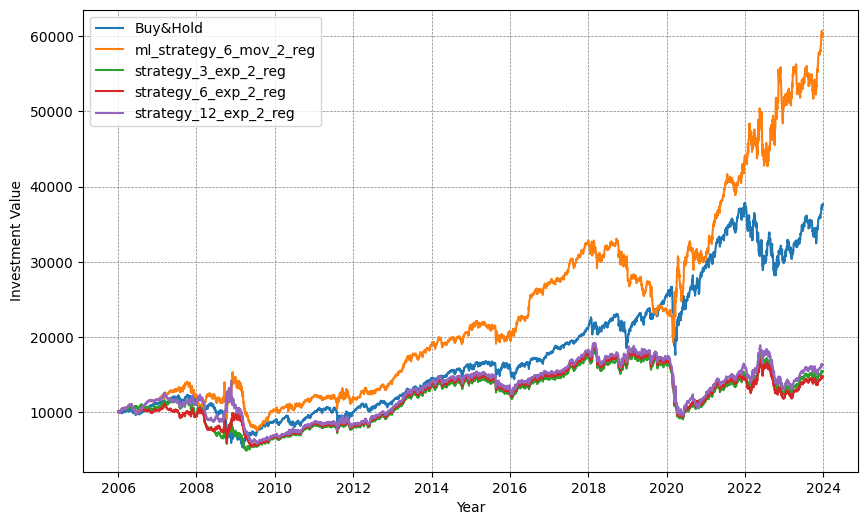

In [29]:
final_object.plot_strategies(['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'strategy_3_exp_2_reg', 'strategy_6_exp_2_reg', 'strategy_12_exp_2_reg'])

In [30]:
final_object.strategies_metrics.round(4).loc[['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'ml_strategy_3_mov_3_reg', 'ml_strategy_6_mov_3_reg', 'ml_strategy_12_mov_3_reg'], :].to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & ARC & ASD & MaxDD & IR & AdjIR \\\\\n\\midrule\nBuy&Hold & 0.076500 & 0.198800 & 0.567800 & 0.384500 & 0.051800 \\\\\nml_strategy_6_mov_2_reg & 0.105000 & 0.198300 & 0.507000 & 0.529600 & 0.109700 \\\\\nml_strategy_3_mov_3_reg & 0.088000 & 0.198400 & 0.518500 & 0.443600 & 0.075300 \\\\\nml_strategy_6_mov_3_reg & 0.128400 & 0.198300 & 0.472100 & 0.647700 & 0.176200 \\\\\nml_strategy_12_mov_3_reg & 0.042200 & 0.198400 & 0.639300 & 0.212600 & 0.014000 \\\\\n\\bottomrule\n\\end{tabular}\n'

2024-11-03 17:06:10 -- INFO -- ArimaGarchAnalyzer:  Rozpoczynam rysowanie wykresów z atrybutów ['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'ml_strategy_6_mov_3_reg']
2024-11-03 17:06:10 -- INFO -- ArimaGarchAnalyzer:  Atrybut Buy&Hold nie istnieje w obiekcie, zatem zostanie pominięty
2024-11-03 17:06:10 -- INFO -- ArimaGarchAnalyzer:  pd.DataFrame na bazie którego narysowano wykres został zapisany jako atrybut o nazwie dfs_to_plot i jest łatwo dostępny z poziomu obiektu


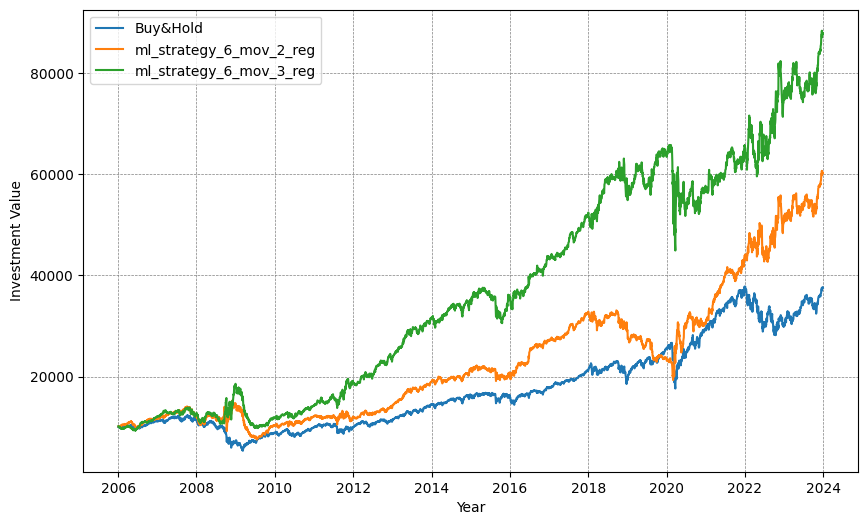

In [31]:
final_object.plot_strategies(['Buy&Hold', 'ml_strategy_6_mov_2_reg', 'ml_strategy_6_mov_3_reg'])

## Weryfikacja testem statystycznym

In [32]:
benchmark_returns = np.log(final_object.main_df.Close / final_object.main_df.ClosePrevious).loc[final_object.main_df.index >= pd.to_datetime('2006-01-01')]


In [33]:
base_strategy = final_object.__getattribute__('ml_strategy_6_mov_2_reg').StrategyDailyReturn

for index in final_object.strategies_metrics.index:
    if index == 'Buy&Hold':
        continue
    
    x = final_object.__getattribute__(index)
    returns = x.StrategyDailyReturn
    # diff = benchmark_returns - returns
    diff = base_strategy - returns
    stat = (final_object.strategies_metrics.loc[index, 'IR'] - final_object.strategies_metrics.loc['ml_strategy_6_mov_2_reg', 'IR']) / (np.std(diff, ddof=1) / np.sqrt(len(returns)))
    print(f'Index: {index}, statistic: {stat}, critical value: {scipy.stats.t.ppf(0.05, len(diff))}, p-value: {scipy.stats.t.cdf(stat, df=len(diff))}'
          f', result: {"PASS" if stat >= scipy.stats.t.ppf(0.05, len(diff)) else "FAILED"}')

    # H_0: The information Ratio of the strategy is not greater than the base strategy information ratio - IR_strat_tested <= IR_strat
    # H_A: The information Ratio of the strategy is greater than the base strategy information ratio - IR_strat_tested > IR_strat
    
    # Chcąc odrzucić hipotezę zerową chcemy, aby wartość statystyki testowej > -1.64 - co ma obecnie miejsce gdy 
    # Wartość krytyczna w tym teście to -1.64 na poziomie ufności 5%, to co <= -1.64 potwierdza hipotezę zerową
    

Index: arima_250, statistic: -750.8349456828989, critical value: -1.6451901433514105, p-value: 0.0, result: FAILED
Index: eGARCH_ged_250, statistic: -2539.697853938973, critical value: -1.6451901433514105, p-value: 0.0, result: FAILED
Index: eGARCH_sstd_250, statistic: -2622.4461593084006, critical value: -1.6451901433514105, p-value: 0.0, result: FAILED
Index: eGARCH_snorm_250, statistic: -230.82046746723924, critical value: -1.6451901433514105, p-value: 0.0, result: FAILED
Index: eGARCH_jsu_250, statistic: -1853.7509697046764, critical value: -1.6451901433514105, p-value: 0.0, result: FAILED
Index: sGARCH_ged_250, statistic: -1551.0019942169613, critical value: -1.6451901433514105, p-value: 0.0, result: FAILED
Index: sGARCH_sstd_250, statistic: -1699.386727780718, critical value: -1.6451901433514105, p-value: 0.0, result: FAILED
Index: sGARCH_snorm_250, statistic: -1345.386552303778, critical value: -1.6451901433514105, p-value: 0.0, result: FAILED
Index: sGARCH_jsu_250, statistic: -

C:\Users\damia\AppData\Local\Temp\ipykernel_7876\2002202683.py:11: RuntimeWarning: invalid value encountered in scalar divide
  stat = (final_object.strategies_metrics.loc[index, 'IR'] - final_object.strategies_metrics.loc['ml_strategy_6_mov_2_reg', 'IR']) / (np.std(diff, ddof=1) / np.sqrt(len(returns)))
